## Pennod 05: Mathemateg symbolaidd gyda Sympy

Mae'r daflen lab yma yn cyflwyno'r llyfrgell fathemategol Sympy sy'n gadael i ni gario allan mathemateg symbolaidd.

Wythnos diwethaf gwelon ni amryw o lyfrgelloedd gwahanol:

In [1]:
import random
import math

ac mae llawer mwy. Mae'r llyfrgelloedd yma yn rhan o'r ''llyfrgell safonol''.
Mae hwn yn golygu eu bod yn dod gyda'r fersiwn Python sylfaenol. Mae amryw o
llyfrgelloedd eraill yn bodoli a ddatblygwyd yn annibynnol. Mae rhai i rain
yn dod gyda Anaconda.

Bydd y daflen lab yma yn cyflwyno un o'r llyfrgelloedd yma:
[SymPy](http://www.sympy.org/en/index.html) sy'n galluogi ni i gwneud
mathemateg symbolaidd.


### 1. Cyfrifiadau union

[Fideo yn disgrifio'r cysyniad.](https://youtu.be/pLxvfpwbf7E)

[Fideo demo.](https://youtu.be/ZmbX8P8dx-U)

Yn defnyddio Python gallwch gyfrifo ail-israddau a gwerthoedd trigonometrig (gallwn wneud hyn trwy fewnforio'r llyfrgell math)::

In [2]:
import math
math.sqrt(20)

4.47213595499958

In [3]:
math.cos(math.pi / 4)

0.7071067811865476

Mae hwn yn iawn ar gyfer gwaith rhifiadol ond dim pan mae'n dod i gario allan cyfrifiadau mathemategol **union**, er enghraifft gwyddon fod:

\\[
    \cos(\pi / 4) = \sqrt{2} / 2
\\]

Dyma le mae Sympy yn ddefnyddiol: gall cario allan cyfrifiadau mathemategol union:

In [4]:
import sympy as sym
sym.sqrt(20)

2*sqrt(5)

In [5]:
sym.cos(sym.pi / 4)

sqrt(2)/2

Mae hefyd yn rhoi rhifau cymhlyg:

In [6]:
sym.I ** 2

-1

In [7]:
sym.sqrt(-20)

2*sqrt(5)*I

Mae gan Sympy nifer o ffwythiannau i drin rhifau naturiol:

In [8]:
N = 45 * 63
sym.isprime(N)

False

In [9]:
sym.primefactors(N)

[3, 5, 7]

In [10]:
all(sym.isprime(p) for p in sym.primefactors(N))  # Mae holl ffactoriau cysefin yn rhifau cysefin

True

In [11]:
sym.factorint(N)

{3: 4, 5: 1, 7: 1}

In [12]:
N == 3 ** 4 * 5 * 7  # Gwirio allbwn `factorint`

True

Ailadroddwch yr enghraifft uchod gyda gwerth gwahanol o `N`.


### 2. Mynegiadau symbolaidd

[Fideo yn disgrifio'r cysyniad.](https://youtu.be/QaxNFo7vpEE)

[Fideo demo.](https://youtu.be/ItcZk5MY9D8)

Gan ddefnyddio Sympy mae'n bosib cario allan cyfrifiadau symbolaidd. I wneud hwn mae angen creu achosion o ddosbarth Symbols Sympy.

In [13]:
x = sym.Symbol("x")
x

x

In [14]:
type(x)

sympy.core.symbol.Symbol

Yna gallwn drin y gwrthrych symbol yma heb roi gwerthoedd rhifol penodol iddo:

In [15]:
x + x

2*x

In [16]:
x - x

0

In [17]:
x ** 2

x**2

Mae gan Sympy ffwythiant defnyddiol `symbols` (gyda `s` bach) sy'n galluogi ni creu mwy nag un gwrthrych `sympy.Symbol` ar yr un pryd:

In [18]:
y, z = sym.symbols("y, z")
y, z

(y, z)

Gallwn drin mynegiannau symbolaidd gan ddefnyddio'r dulliau Sympy:


- `factor` (ffactoreiddio)
- `expand` (ehangu)

Fan hyn rydym yn cadarnhau rhyw fformiwla enwog:

In [19]:
myn = x ** 2 + 2 * x * y + y ** 2
myn

x**2 + 2*x*y + y**2

In [20]:
myn.factor()

(x + y)**2

In [21]:
myn = (x - y) * (x + y)
myn

(x - y)*(x + y)

In [22]:
sym.expand(myn)  # Nodwch gallwn hefyd defnyddio `myn.expand`

x**2 - y**2

Mae gan Sympy gorchymyn `simplify` sy'n bwerus iawn. Arbrofwch gyda rhain a hefyd gyda mynegiannau mwy cymhleth.

### 3. Hafaliadau symbolaidd

[Fideo yn disgrifio'r cysyniad.](https://youtu.be/J0gU7GInOwI)

[Fideo demo.](https://youtu.be/8zTzpDW00Ek)

Gallwn ddefnyddio Sympy i ddatrys hafaliadau symbolaidd. Gadewch i ni ddatrys yr hafaliad symbolaidd canlynol:

\\[
    x ^ 2 + 3 x - 2 = 0
\\]

Rydym yn gwneud hwn try defnyddio'r ffwythiant `solveset`:

In [23]:
sym.solveset(x ** 2 + 3 * x - 2, x)

FiniteSet(-3/2 + sqrt(17)/2, -sqrt(17)/2 - 3/2)

Os oedd gan ein hafaliad ochr dde nad oedd yn sero mae dwy ffordd o deilo â hwn:

\\[
    x^2 + 3x - 2=y
\\]

`1`. Newid yr hafaliad fel ei bod yn cyfateb â hafaliad gyda sero ar yr ochr dde:

In [24]:
sym.solveset(x ** 2 + 3 * x - 2 - y, x)

FiniteSet(-sqrt(4*y + 17)/2 - 3/2, sqrt(4*y + 17)/2 - 3/2)

`2`. Creu gwrthrych `Eq`:

In [25]:
haf = sym.Eq(x ** 2 + 3 * x - 2, y)
sym.solveset(haf, x)

FiniteSet(-sqrt(4*y + 17)/2 - 3/2, sqrt(4*y + 17)/2 - 3/2)

Gallwn hefyd nodi parth. Er enghraifft mae gan yr hafaliad canlynol canlynol dau ddatrysiad (gan ei fod yn gwadratig):

\\[
    x^2 = -9
\\]

In [26]:
sym.solveset(x ** 2 + 9, x)

FiniteSet(-3*I, 3*I)

Ond os cyfyngwn ni ein hunain i'r rhifau real, dim hwn yw'r achos rhagor:

In [27]:
sym.solveset(x ** 2 + 9, x, domain=sym.S.Reals)

EmptySet

### 4. Calcwlws symbolaidd

[Fideo yn disgrifio'r cysyniad.](https://youtu.be/7_uzDdVsaGE)

[Fideo demo.](https://youtu.be/zjQGPaHlsH4)

Mae'n bosib cario allan amryw o weithrediadau calcwlws gan ddefnyddio Sympy:

Ystyriwch y ffwythiant:

\\[
    f(x) = 1 / x
\\]

I wneud hwn diffiniwn ffwythiant Python arferol:

In [28]:
def f(x):
    return 1 / x

a rhoi newidyn symbolaidd iddo:

In [29]:
f(x)

1/x

Gallwn gyfrifo'r terfannau yn \\(\pm\infty\\)


In [30]:
sym.limit(f(x), x, sym.oo)

0

In [31]:
sym.limit(f(x), x, -sym.oo)

0

In [32]:
sym.limit(f(x), x, +sym.oo)

0

Gallwn gyfrifo'r terfan yn \\(0\\) ond rhaid bod yn ofalus fan hyn (cofiwch o galcwlws sylfaenol bod y terfan yn dibynnu ar y cyfeiriad):

In [33]:
sym.limit(f(x), x, 0)  # Y cyfeiriad diofyn yw'r positive

oo

In [34]:
sym.limit(f(x), x, 0, dir="+")

oo

In [35]:
sym.limit(f(x), x, 0, dir="-")

-oo

Gallwn ddefnyddio Sympy i ddifferu:

In [36]:
sym.diff(f(x), x)

-1/x**2

In [37]:
sym.diff(sym.cos(x), x)

-sin(x)

Gallwn gario allan nifer o raddau o ddifferu. Mae'r rhain i gyd yn rhoi'r deilliad ail radd o \\(\cos(x)\\):

In [38]:
sym.diff(sym.diff(sym.cos(x), x), x)

-cos(x)

In [39]:
sym.diff(sym.cos(x), x, x)

-cos(x)

In [40]:
sym.diff(sym.cos(x), x, 2)

-cos(x)

Yn ogystal â differu gallwn hefyd integru.

Gallwn wneud integrynnau pendant ac integrynnau amhendant:

In [41]:
sym.integrate(f(x), x)  # Integryn amhendant

log(x)

In [42]:
sym.integrate(f(x), (x, sym.exp(1), sym.exp(5)))  # Integryn pendant

4

### 5. Hafaliadau differol

[Fideo yn disgrifio'r cysyniad.](https://youtu.be/GVOCHUFd4do)

[Fideo demo.](https://youtu.be/VIxjluFb6rM)

Gallwn ddefnyddio Sympy i ddatrys hafaliadau differol. Er enghraifft:

\\[
    \frac{dy}{dx} = y
\\]

In [43]:
y = sym.Function('y')
x = sym.symbols('x')
dat = sym.dsolve(sym.Derivative(y(x), x) - y(x), y(x))
dat

Eq(y(x), C1*exp(x))

Gwiriwn os yw'r datrysiad hwn yn gywir:

In [44]:
sym.diff(dat.rhs, x) == dat.rhs

True

Gallwn ddatrys hafaliadau differol o radd uwch. Er enghraifft, defnyddir yr hafaliad canlynol i fodelu lleoliad rhyw fàs ar linyn:

\\[
    m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = 0
\\]

In [45]:
m, c, k, t = sym.symbols('m, c, k, t')
x = sym.Function("x")
sym.dsolve(m * sym.Derivative(x(t), t, 2) + c * sym.Derivative(x(t), t) + k * x(t), x(t))

Eq(x(t), C1*exp(t*(-c - sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)))

Gallwn ddatrys system o hafaliadau differol fel y rhain:

\\[
    \begin{aligned}
        \frac{dx}{dt} & = 1-y\\
        \frac{dy}{dt} & = 1-x\\
    \end{aligned}
\\]

In [46]:
eq1 = sym.Derivative(x(t), t) - 1 + y(t)
eq2 = sym.Derivative(y(t), t) - 1 + x(t)
sym.dsolve((eq1, eq2))

[Eq(x(t), -C1*exp(t) - C2*exp(-t) + 1), Eq(y(t), C1*exp(t) - C2*exp(-t) + 1)]

Rhoddir y datrysiad:

\\[
    \begin{align}
        x(t) & =-C_1e^{-t}-C_2e^{t} + 1\\
        y(t) & =-C_1e^{-t}-C_2e^{t} + 1\\
    \end{align}
\\]

### 6. Dangos allbynnau gyda \\(\LaTeX\\)

[Fideo yn disgrifio'r cysyniad.](https://youtu.be/8aE-97MWoRQ)

[Fideo demo.](https://youtu.be/iVj7dh-opPU)

Gallwn ddefnyddio \\(\LaTeX\\) i dangos allbwn Sympy mewn ffordd sy'n haws i bobl darllen:

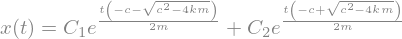

In [47]:
sym.init_printing()
m, c, k, t = sym.symbols('m, c, k, t')
x = sym.Function("x")
sym.dsolve(m * sym.Derivative(x(t), t, 2) + c * sym.Derivative(x(t), t) + k * x(t), x(t))

Weithiau mae'n ddefnyddiol diffodd hwn (er enghraifft os oeddwn angen copïo a gludo allbwn):

In [48]:
sym.init_printing(False)
m, c, k, t = sym.symbols('m, c, k, t')
x = sym.Function("x")
sym.dsolve(m * sym.Derivative(x(t), t, 2) + c * sym.Derivative(x(t), t) + k * x(t), x(t))

Eq(x(t), C1*exp(t*(-c - sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)))

---


## Ymarferion

Dyma nifer o ymarferion sy'n bosib cwblhau trwy ddefnyddio Sympy:

- Defnyddio rhifyddeg union;
- Trin newidynnau symbolaidd yn algebraidd;
- Terfannau, differu ac integru;
- Datrys hafaliadau differol.


### Ymarfer 1.

Defnyddiwch SymPy i ysgrifennu'r \\(10^3\\) rhif cysefin cyntaf i ffeil. Cymharwch hwn i'r ffeil `cysefin.csv` ([lawrlwytho](/{{root}}/nbs/cy/chapters/cysefin.csv)) (nid gyda llaw!) a gwirio os yw'n unfath.

Mae angen gwneud bach o waith i ddarganfod sut i eneradu rhifau cysefin gan ddefnyddio sympy. Bydd rhaid chwilio.

In [49]:
sym.prime(5)  # y 5ed rhif cysefin yw 11

11

In [50]:
# generadwn y 10 ** 3 rhif cysefin cyntaf: gall hwn cymryd spel
rhifau_cysefin = [sym.prime(k) for k in range(1, 10 ** 3 + 1)]

In [51]:
# Gadewch i ni darllen y rhifau cysefin i ffeil:
with open("cysefin.csv", 'r') as f:
    rhifau_cysefin_o_ffeil = f.read().split('\n')
rhifau_cysefin_o_ffeil[:5]  # Gweld y 5 cyntaf

['2', '3', '5', '7', '11']

In [52]:
rhifau_cysefin_o_ffeil[-5:]  # Gweld y 5 olaf

['15485843', '15485849', '15485857', '15485863', '']

In [53]:
rhifau_cysefin_o_ffeil[:10 ** 3] == [str(p) for p in rhifau_cysefin]  # Rydym ni ond yn ystyried y 10 ** 3 rhif cyntaf yn y ffeil

True

### Ymarfer 2. 

Defnyddiwch ddull `simplify` Sympy (ar y cyd gyda phethau eraill) i wirio'r unfathiannau trigonometrig canlynol:

1. \\(\sin^2(\theta) + \cos^2(\theta) = 1\\)
2. \\(2\cos(\theta) \sin(\theta) = \sin(2\theta)\\)
3. \\((1 - \cos(\theta)) / 2 = \sin^2(\theta / 2)\\)
4. \\(\cos(n\pi)=(-1) ^ n\\) (for \\(n\in\mathbb{Z}\\)) (Awgrym: bydd angen i chi edrych ar yr opsiynau gallwch basio i `symbols` er mwyn gwneud hwn)

In [54]:
theta = sym.symbols('theta')
(sym.sin(theta) ** 2 + sym.cos(theta) ** 2).simplify()  == 1

True

In [55]:
(2 * sym.cos(theta) * sym.sin(theta)).simplify() == sym.sin(2 * theta)

True

Mae angen gweithio bach yn galetach i wirio'r hafaliad fan hyn, cymerwch y gwahaniaeth a gweld ei fod yn hafal i 0.

In [56]:
((1 - sym.cos(theta)) / 2 - sym.sin(theta / 2) ** 2).simplify()

0

Gwelwn pa opsiynau gallwn basio i symbols:

In [57]:
sym.symbols?

In [58]:
n = sym.symbols('n', integer=True)
sym.cos(n * sym.pi).simplify()

(-1)**n

### Ymarfer 3.

Nod y cwestiwn yma yw archwilio i mewn i ddiffiniad y deilliad:

\\[
    \frac{df}{dx}=\lim_{h\to 0}\frac{f(x+h)-f(x)}{h}
\\]

1. Ystyriwch \\(f(x) = x^3 + 3x - 20\\);
2. Cyfrifwch \\(\frac{f(x+h)-f(x)}{h}\\);
3. Cyfrifwch y terfan uchod wrth i \\(h\to 0\\) a gwirio taw hwn yw deilliad \\(f\\).

In [59]:
def f(x):
    return x ** 3 + 3 * x - 20

In [60]:
h, x = sym.symbols('h, x')
rhs = (f(x + h) - f(x)) / h
rhs

(3*h - x**3 + (h + x)**3)/h

In [61]:
sym.limit(rhs, h, 0)

3*x**2 + 3

In [62]:
sym.diff(f(x), x)

3*x**2 + 3

### Ymarfer 4.

Canfyddwch ddatrysiad cyffredinol y 4 hafaliad differol:

1. \\(\frac{dy}{dx}-6y=3e^x\\)
2. \\(\frac{dy}{dx}+\frac{x(2x-3)}{x^2+1}=\sin(x)\\)
3. \\(\frac{d^2y}{dx^2}-y=\sin(5x)\\)
4. \\(\frac{d^2y}{dx^2}+2\frac{dy}{dx}+2x=\cosh(x)\\)

In [63]:
haf1 = sym.Derivative(y(x), x) - 6 * y(x) - 3 * sym.exp(x)
dat1 = sym.dsolve(haf1, y(x))
dat1

Eq(y(x), (C1 - 3*exp(-5*x)/5)*exp(6*x))

In [64]:
haf2 = sym.Derivative(y(x), x) + x * (2 * x - 3) / (x ** 2 + 1) - sym.sin(x)
dat2 = sym.dsolve(haf2, y(x))
dat2

Eq(y(x), C1 - 2*x + 3*log(x**2 + 1)/2 - cos(x) + 2*atan(x))

In [65]:
haf3 = sym.Derivative(y(x), x, 2) - y(x) - sym.sin(5 * x)
dat3 = sym.dsolve(haf3, y(x))
dat3

Eq(y(x), C1*exp(-x) + C2*exp(x) - sin(5*x)/26)

In [66]:
haf4 = sym.Derivative(y(x), x, 2) +  2 * sym.Derivative(y(x), x) + 2 * x - sym.cosh(x)
dat4 = sym.dsolve(haf4, y(x))
dat4

Eq(y(x), C1 + C2*exp(-2*x) - x**2/2 + x/2 + 2*sinh(x)/3 - cosh(x)/3)

### Ymarfer5.

Gallwn fodelu brwydr rhwng dwy fyddin gyda'r set o hafaliadau differol canlynol:

\\[
   \begin{cases}
     \frac{dx}{dt} = - y\\
     \frac{dy}{dt} = -5x
   \end{cases}
\\]

Canfyddwch ddatrysiad i'r system yma o hafaliadau.

In [67]:
x, y = sym.Function('x'), sym.Function('y')
haf1 = sym.Derivative(x(t), t) + y(t)
haf2 = sym.Derivative(y(t), t) + 5 * x(t)
dats = sym.dsolve((haf1, haf2))
dats

[Eq(x(t), -C1*exp(sqrt(5)*t) - C2*exp(-sqrt(5)*t)), Eq(y(t), sqrt(5)*C1*exp(sqrt(5)*t) - sqrt(5)*C2*exp(-sqrt(5)*t))]

---

## Adnoddau pellach

- [Nodiaday darlith scipy-lecture ar Sympy](https://www.scipy-lectures.org/packages/sympy.html)
- [Dogfennaeth Sympy ar hafaliadau differol](https://docs.sympy.org/dev/modules/solvers/ode.html)